In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Amin\\Documents\\manutd(2012-2021)\\shots(12-13).csv')

In [3]:
df.head()

,Squad,# Pl,Gls,SoT,SoT/90,G/SoT,PK,PKatt
0,Arsenal,26,69,272,7.16,0.24,5,6
1,Aston Villa,28,47,176,4.63,0.25,3,3
2,Chelsea,26,71,257,6.76,0.24,9,11
3,Everton,23,53,266,7.00,0.19,2,2
4,Fulham,29,45,205,5.39,0.19,6,6


In [4]:
df = df.drop(['# Pl','PK','PKatt'],axis=1)

In [5]:
df

,Squad,Gls,SoT,SoT/90,G/SoT
0,Arsenal,69,272,7.16,0.24
1,Aston Villa,47,176,4.63,0.25
2,Chelsea,71,257,6.76,0.24
3,Everton,53,266,7.00,0.19
4,Fulham,45,205,5.39,0.19
5,Liverpool,67,297,7.82,0.21
6,Manchester City,64,285,7.50,0.21
7,Manchester Utd,80,243,6.39,0.31
8,Newcastle Utd,43,208,5.47,0.19
9,Norwich City,40,177,4.66,0.22


In [6]:
min_range = []
max_range = []

#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls', 'SoT', 'SoT/90', 'G/SoT']

In [7]:
#finding max and min Goals scored
min_Gls = min(df[params]['Gls'])
max_Gls = max(df[params]['Gls'])
min_range.append(min_Gls)
max_range.append(max_Gls)

#finding max and min Shots on Target
min_SoT = min(df[params]['SoT'])
max_SoT = max(df[params]['SoT'])
min_range.append(min_SoT)
max_range.append(max_SoT)


#finding max and min Shots on Target per 90
min_SoTp90 = min(df[params]['SoT/90'])
max_SoTp90 = max(df[params]['SoT/90'])
min_range.append(min_SoTp90)
max_range.append(max_SoTp90)


#finding max and min Goals per Shots on Target
min_GpSoT = min(df[params]['G/SoT'])
max_GpSoT = max(df[params]['G/SoT'])
min_range.append(min_GpSoT)
max_range.append(max_GpSoT)


In [8]:
df = df[df['Squad']=='Manchester Utd'].reset_index()

In [9]:
df

,index,Squad,Gls,SoT,SoT/90,G/SoT
0,7,Manchester Utd,80,243,6.39,0.31


In [10]:
min_range

[29, 144, 3.79, 0.15]

In [11]:
max_range

[80, 297, 7.82, 0.31]

In [12]:
for x in range(len(df['Squad'])):
    if df['Squad'][x] == 'Manchester Utd':
        values = df.iloc[x].values.tolist()

In [13]:
values = values[2:]

In [14]:
values

[80, 243, 6.39, 0.31]

In [15]:
#title 

title = dict(
    title_name='Manchester United 14-15',
    title_color = 'red',
    subtitle_name = 'Shot Creation',
    subtitle_color = 'black',

    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = 'Viz. by Chaitanya Shetty'

In [16]:
radar = Radar(params, min_range, max_range,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*4,
              num_rings=3,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [17]:
#We will use mplsoccer’s FontManager to load some fonts from Google Fonts. 
#We borrowed the FontManager from the ridge_map library.

URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

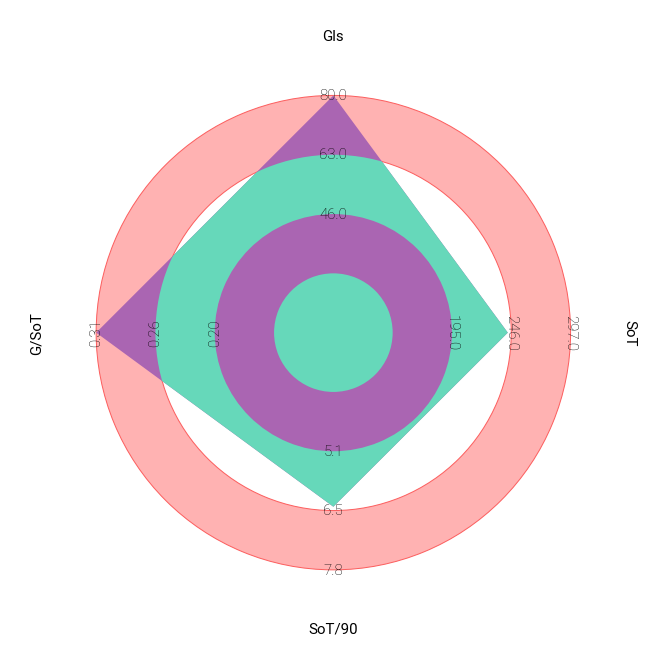

In [18]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels